# Data Exploration

## Install dependencies

### Import Packages
Import the necessary packages that will be used in the exploration.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

### Data Loading
Load the SQLite data file into the notebook using pandas.

In [4]:
df = pd.read_sql_table('weather_traffic_fines', 'sqlite:///data/data.sqlite')

In [5]:
df.head(10)

,DATE,T2M,T2MDEW,QV2M,PRECTOTCORR,PS,WS10M,WD10M,TRAFFIC OFFENCE FREQUENCIES
0,2022-01-01,8.74,8.08,6.90,0.11,97.96,5.12,218.75,199
1,2022-01-02,7.61,6.01,6.04,1.96,97.11,7.83,227.38,162
2,2022-01-03,7.15,6.08,6.04,5.73,96.67,7.70,241.56,297
3,2022-01-04,4.27,3.70,5.25,15.48,95.43,3.80,256.81,255
4,2022-01-05,0.80,0.01,3.97,2.29,96.24,7.89,281.19,401
5,2022-01-06,0.20,-0.36,3.85,0.32,97.32,4.28,263.19,357
6,2022-01-07,0.37,-0.52,3.78,6.90,96.75,6.46,215.94,402
7,2022-01-08,0.45,-0.26,3.91,4.39,96.06,7.25,228.94,198
8,2022-01-09,0.87,0.36,4.09,5.28,95.61,6.73,266.06,192
9,2022-01-10,-0.57,-2.20,3.30,0.05,97.64,1.43,207.75,449


In [6]:
df.tail(10)

,DATE,T2M,T2MDEW,QV2M,PRECTOTCORR,PS,WS10M,WD10M,TRAFFIC OFFENCE FREQUENCIES
355,2022-12-22,7.00,6.61,6.35,12.76,96.12,6.03,230.62,577
356,2022-12-23,7.77,7.26,6.65,12.91,96.09,7.05,243.88,425
357,2022-12-24,7.26,6.59,6.29,1.27,96.93,5.62,240.88,430
358,2022-12-25,7.08,6.67,6.35,3.50,96.89,5.95,196.94,441
359,2022-12-26,6.27,5.44,5.86,3.68,97.16,6.94,250.56,445
360,2022-12-27,2.57,1.93,4.46,0.21,97.96,6.59,224.94,443
361,2022-12-28,5.58,4.76,5.55,2.14,96.82,9.41,210.94,431
362,2022-12-29,6.99,5.48,5.86,1.76,96.29,9.45,229.25,444
363,2022-12-30,6.34,5.72,6.04,3.79,96.43,8.83,202.94,391
364,2022-12-31,11.63,9.82,7.87,1.11,96.67,11.03,218.12,415


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   DATE                         365 non-null    datetime64[ns]
 1   T2M                          365 non-null    float64       
 2   T2MDEW                       365 non-null    float64       
 3   QV2M                         365 non-null    float64       
 4   PRECTOTCORR                  365 non-null    float64       
 5   PS                           365 non-null    float64       
 6   WS10M                        365 non-null    float64       
 7   WD10M                        365 non-null    float64       
 8   TRAFFIC OFFENCE FREQUENCIES  365 non-null    int64         
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 25.8 KB


### Data Visualization

A Boxplot is created to get the visual summary of the variability of values in a dataset to show the median, upper and lower quartiles, minimum and maximum values, and any outliers in the dataset.

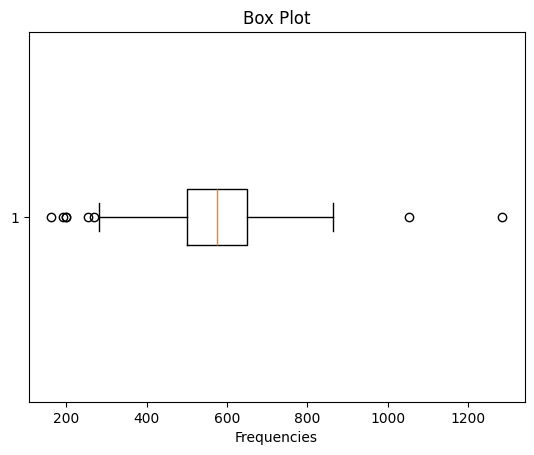

Box Plot Information:
Minimum: 280.0
First Quartile (Q1): 500.0
Median: 574.0
Third Quartile (Q3): 651.0
Maximum: 864.0


In [9]:
# Create a box plot
box = plt.boxplot(df['TRAFFIC OFFENCE FREQUENCIES'], vert=False)

# Set labels and title
plt.xlabel('Frequencies')
plt.title('Box Plot')

# Display the plot
plt.show()

# Calculate the statistics for the box plot
statistics = {
    'min': np.min(box['whiskers'][0].get_data()[0]),
    'q1': np.percentile(box['boxes'][0].get_data()[0], 25),
    'median': np.median(box['medians'][0].get_data()[0]),
    'q3': np.percentile(box['boxes'][0].get_data()[0], 75),
    'max': np.max(box['whiskers'][1].get_data()[0])
}

# Print the information
print("Box Plot Information: ")
print(f"Minimum: {statistics['min']}")
print(f"First Quartile (Q1): {statistics['q1']}")
print(f"Median: {statistics['median']}")
print(f"Third Quartile (Q3): {statistics['q3']}")
print(f"Maximum: {statistics['max']}")

The trend of traffic fine frequencies each day over the year 2022 is observed from the following line chart.

NameError: name 'ticker' is not defined

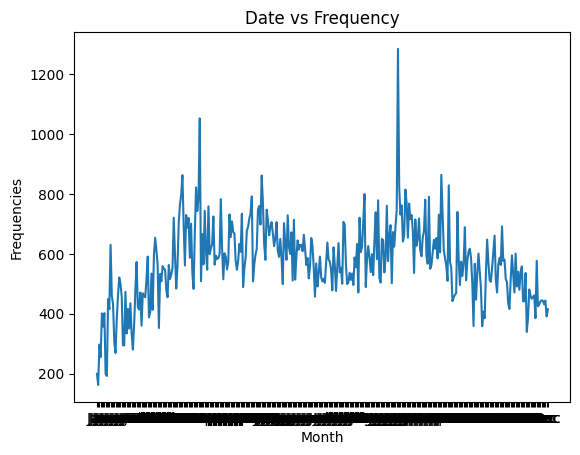

In [10]:
# Frequencies of traffic fines each day over the year.
plt.plot(df['DATE'], df['TRAFFIC OFFENCE FREQUENCIES'])
plt.xlabel('Month')
plt.ylabel('Frequencies')
plt.title('Date vs Frequency')
plt.xticks(df['DATE'], df['DATE'].dt.strftime('%b'))
max_ticks = 14
locator = ticker.MaxNLocator(max_ticks)
plt.gca().xaxis.set_major_locator(locator)
plt.show()